# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Kristover Armand
- **Email:** mkarmand43@gmail.com
- **ID Dicoding:** mk_armand_13

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren suhu bulanan di changping?
- Pertanyaan 2: Bagaimana tren PM2.5 bulanan di changping


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset
data_df = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")

### Assessing Data

Tipe Data

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Cek Missing Value

In [4]:
data_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


Cek Duplikasi Data

In [5]:
data_df.duplicated().sum()

0

Deskripsi Data

In [6]:
data_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Pre Processing

In [7]:
# Data preprocessing
data_df['date'] = pd.to_datetime(data_df[['year', 'month', 'day', 'hour']])
data_df.set_index('date', inplace=True)

### Cleaning Data

In [8]:
data_df['PM2.5'].fillna(data_df['PM2.5'].mean(), inplace=True)
data_df['PM10'].fillna(data_df['PM10'].mean(), inplace=True)
data_df['SO2'].fillna(data_df['SO2'].mean(), inplace=True)
data_df['NO2'].fillna(data_df['NO2'].mean(), inplace=True)
data_df['CO'].fillna(data_df['CO'].mean(), inplace=True)
data_df['O3'].fillna(data_df['O3'].mean(), inplace=True)
data_df['TEMP'].fillna(data_df['TEMP'].mean(), inplace=True)
data_df['PRES'].fillna(data_df['PRES'].mean(), inplace=True)
data_df['DEWP'].fillna(data_df['DEWP'].mean(), inplace=True)
data_df['RAIN'].fillna(data_df['RAIN'].mean(), inplace=True)
data_df['wd'].fillna(data_df['wd'].mode()[0], inplace=True)
data_df['WSPM'].fillna(data_df['WSPM'].mean(), inplace=True)

<ipython-input-8-35941b88ce2a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['PM2.5'].fillna(data_df['PM2.5'].mean(), inplace=True)
<ipython-input-8-35941b88ce2a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [9]:
data_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:
data_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4916,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.524179,82.746329,20.786642,29.237672,1078.866266,53.846809,11.356720,10.218370,13.811648,0.752352,NaN,1.309005,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,48.000000,74.000000,7.000000,37.000000,800.000000,47.000000,14.600000,1007.400000,1.700000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,129.000000,18.000000,60.000000,1400.000000,79.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


## Visualization & Explanatory Analysis

### Pertanyaan 1: Suhu Bulanan

<ipython-input-11-7b9d8db749c5>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_sorted['TEMP'].resample('M').mean().plot(marker='o', linestyle='-', color='r')


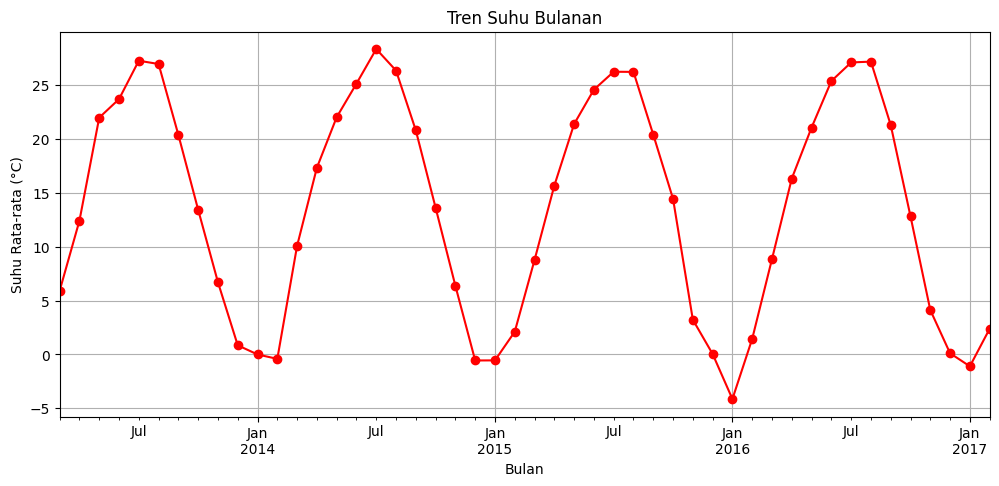

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def trend_temp():
    # Mengonversi tahun, bulan, hari, dan jam menjadi format datetime
    data_df['date'] = pd.to_datetime(data_df[['year', 'month', 'day', 'hour']])

    # Menjadikan 'date' sebagai indeks
    df_sorted = data_df.copy()
    df_sorted.set_index('date', inplace=True)

    # Membuat grafik tren suhu bulanan
    plt.figure(figsize=(12, 5))
    df_sorted['TEMP'].resample('M').mean().plot(marker='o', linestyle='-', color='r')

    # Menambahkan judul dan label
    plt.title("Tren Suhu Bulanan")
    plt.xlabel("Bulan")
    plt.ylabel("Suhu Rata-rata (°C)")
    plt.grid(True)
    plt.show()

trend_temp()


### Pertanyaan 2: Tren PM 2.5 Bulanan

<ipython-input-12-cb5867cc23dd>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_sorted['PM2.5'].resample('M').mean().plot(marker='o', linestyle='-', color='b')


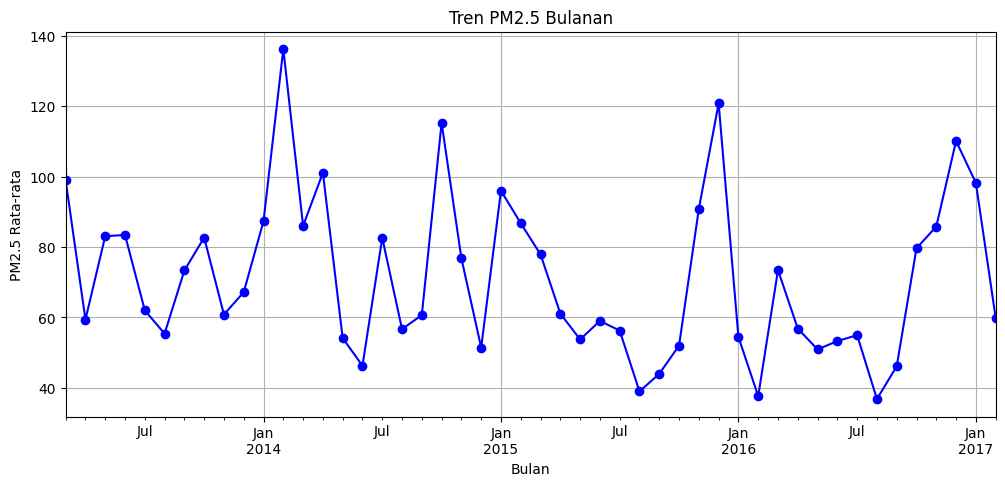

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def trend_pm25():
    data_df['date'] = pd.to_datetime(data_df[['year', 'month', 'day', 'hour']])
    df_sorted = data_df.copy()
    df_sorted.set_index('date', inplace=True)

    plt.figure(figsize=(12, 5))
    df_sorted['PM2.5'].resample('M').mean().plot(marker='o', linestyle='-', color='b')

    plt.title("Tren PM2.5 Bulanan")
    plt.xlabel("Bulan")
    plt.ylabel("PM2.5 Rata-rata")
    plt.grid(True)
    plt.show()

trend_pm25()


## Analisis Lanjutan (Opsional)

In [13]:
# RFM Analysis
data_df['Recency'] = (data_df.index.max() - data_df.index).days
data_df['Frequency'] = data_df.groupby(data_df.index.date)['PM2.5'].transform('count')
data_df['Monetary'] = data_df['PM2.5']  # Menggunakan PM2.5 sebagai indikator kualitas udara
data_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,PRES,DEWP,RAIN,wd,WSPM,station,date,Recency,Frequency,Monetary
date,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,...,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00,1460,24,3.0
2013-03-01 01:00:00,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,...,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00,1460,24,3.0
2013-03-01 02:00:00,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,...,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00,1460,24,3.0
2013-03-01 03:00:00,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,...,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00,1460,24,3.0
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,...,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00,1460,24,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,...,1008.9,-13.3,0.0,NNE,1.3,Changping,2017-02-28 19:00:00,0,24,28.0
2017-02-28 20:00:00,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,...,1009.0,-14.0,0.0,N,2.1,Changping,2017-02-28 20:00:00,0,24,12.0
2017-02-28 21:00:00,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,...,1009.4,-13.0,0.0,N,1.5,Changping,2017-02-28 21:00:00,0,24,7.0


In [14]:
rfm_df = data_df[['Recency', 'Frequency', 'Monetary']].drop_duplicates()
rfm_df

,Recency,Frequency,Monetary
date,,,
2013-03-01 00:00:00,1460,24,3.0
2013-03-01 06:00:00,1460,24,4.0
2013-03-01 08:00:00,1460,24,9.0
2013-03-01 09:00:00,1460,24,11.0
2013-03-01 17:00:00,1460,24,6.0
...,...,...,...
2017-02-28 16:00:00,0,24,15.0
2017-02-28 17:00:00,0,24,18.0
2017-02-28 19:00:00,0,24,28.0


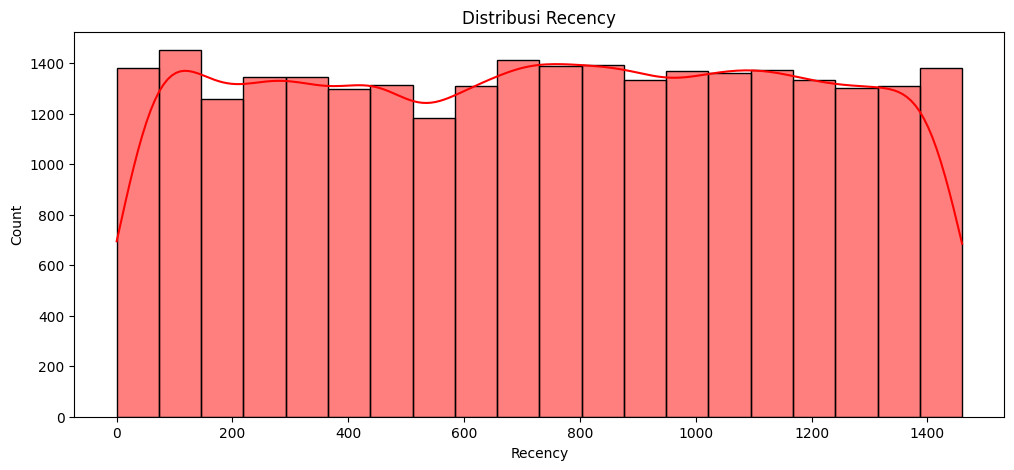

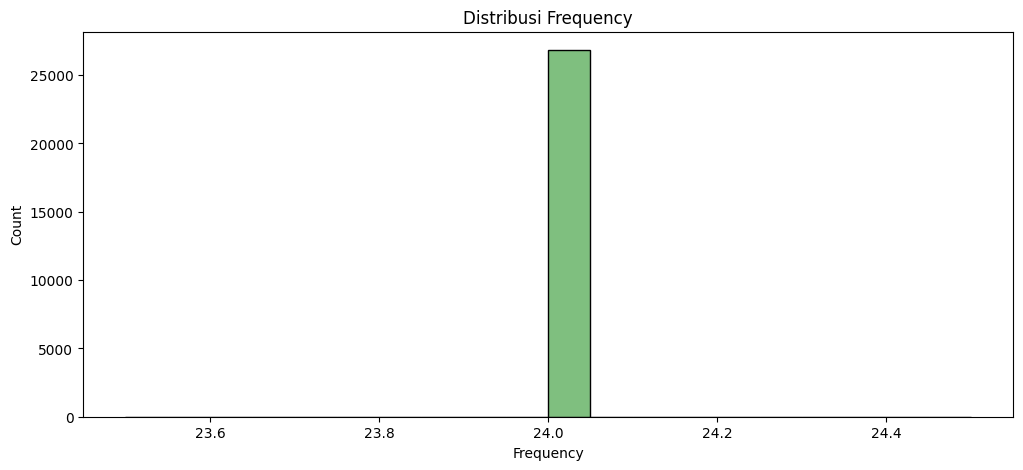

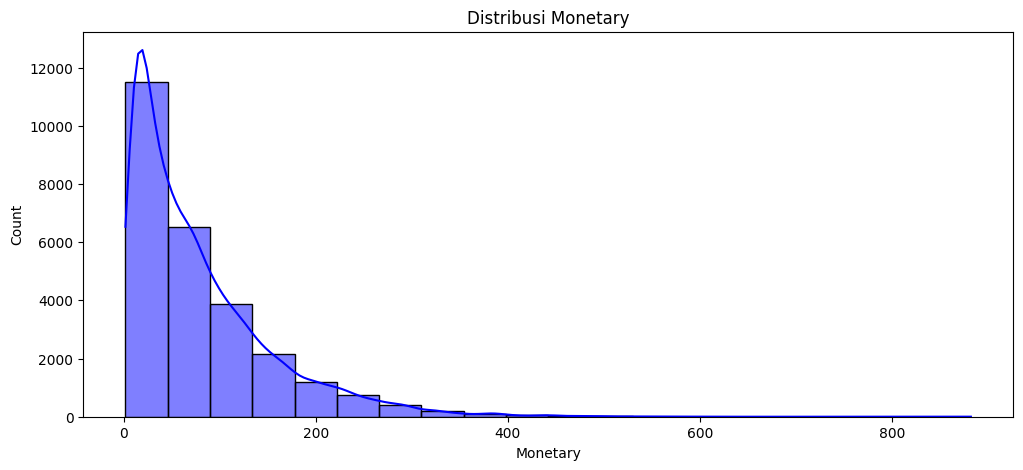

In [15]:
# Visualisasi RFM
plt.figure(figsize=(12, 5))
sns.histplot(rfm_df['Recency'], bins=20, kde=True, color='r')
plt.title("Distribusi Recency")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(rfm_df['Frequency'], bins=20, kde=True, color='g')
plt.title("Distribusi Frequency")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(rfm_df['Monetary'], bins=20, kde=True, color='b')
plt.title("Distribusi Monetary")
plt.show()

In [16]:
# Geospatial Analysis
locations = {
    "Changping": [40.22, 116.23],
}
data_df['latitude'] = locations['Changping'][0]
data_df['longitude'] = locations['Changping'][1]

geo_df = gpd.GeoDataFrame(data_df, geometry=gpd.points_from_xy(data_df.longitude, data_df.latitude))
geo_df

In [17]:
# Peta distribusi PM2.5
m = folium.Map(location=[40.22, 116.23], zoom_start=10)
for _, row in geo_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['PM2.5'] / 50,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.5
    ).add_to(m)
m.save("pm25_map.html")

In [20]:
# Clustering dengan Binning
bins = [0, 35, 75, 115, 150, 250, np.inf]
labels = ['Baik', 'Sedang', 'Tidak Sehat bagi Kelompok Sensitif', 'Tidak Sehat', 'Sangat Tidak Sehat', 'Berbahaya']
data_df['PM2.5_Category'] = pd.cut(data_df['PM2.5'], bins=bins, labels=labels)
data_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,wd,WSPM,station,date,Recency,Frequency,Monetary,latitude,longitude,PM2.5_Category
date,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,...,E,0.5,Changping,2013-03-01 00:00:00,1460,24,3.0,40.22,116.23,Baik
2013-03-01 01:00:00,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,...,ENE,0.7,Changping,2013-03-01 01:00:00,1460,24,3.0,40.22,116.23,Baik
2013-03-01 02:00:00,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,...,ENE,0.2,Changping,2013-03-01 02:00:00,1460,24,3.0,40.22,116.23,Baik
2013-03-01 03:00:00,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,...,NNE,1.0,Changping,2013-03-01 03:00:00,1460,24,3.0,40.22,116.23,Baik
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,...,N,2.1,Changping,2013-03-01 04:00:00,1460,24,3.0,40.22,116.23,Baik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,...,NNE,1.3,Changping,2017-02-28 19:00:00,0,24,28.0,40.22,116.23,Baik
2017-02-28 20:00:00,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,...,N,2.1,Changping,2017-02-28 20:00:00,0,24,12.0,40.22,116.23,Baik
2017-02-28 21:00:00,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,...,N,1.5,Changping,2017-02-28 21:00:00,0,24,7.0,40.22,116.23,Baik


<ipython-input-19-161a26498457>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_df['PM2.5_Category'], palette='coolwarm')


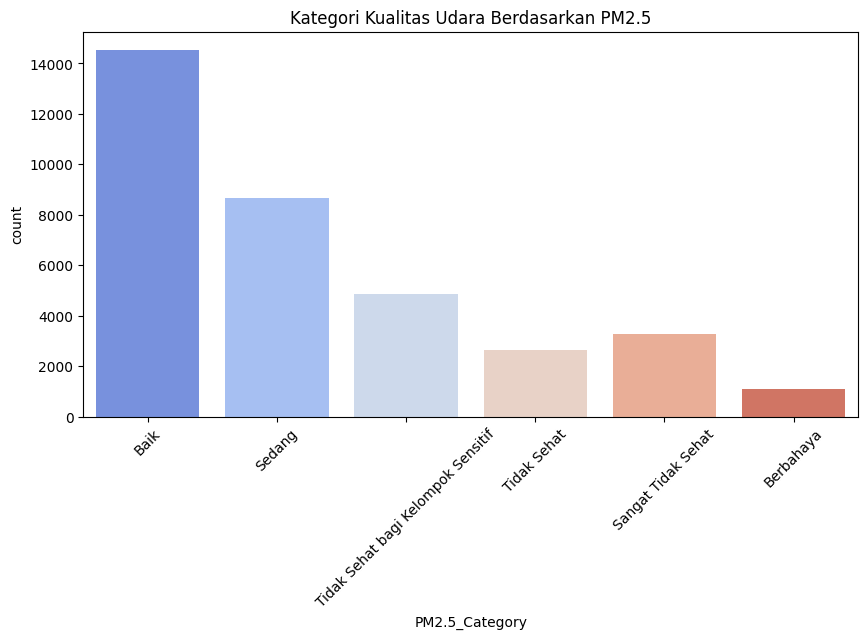

In [19]:
# Visualisasi Kategori PM2.5
plt.figure(figsize=(10, 5))
sns.countplot(x=data_df['PM2.5_Category'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Kategori Kualitas Udara Berdasarkan PM2.5")
plt.show()

## Conclusion

- Conclution pertanyaan 1
1. Suhu tertinggi dalam setahun mencapai sekitar 27–30°C pada puncak musim panas.
2. Suhu terendah turun hingga sekitar -5°C hingga 0°C pada musim dingin.
3. Perubahan suhu cukup drastis antara musim panas dan musim dingin, menunjukkan wilayah dengan perbedaan suhu musiman yang jelas.
4. Setiap tahun menunjukkan tren yang konsisten, dengan puncak suhu terjadi di pertengahan tahun dan titik terendah di awal tahun berikutnya.

- Conclution pertanyaan 2
1. Konsentrasi PM2.5 cenderung lebih tinggi selama musim dingin (sekitar Desember - Februari).
2. Konsentrasi lebih rendah selama musim panas (sekitar Juni - Agustus).
3. Hal ini menunjukkan bahwa musim dingin memiliki tingkat polusi udara lebih tinggi dibanding musim lainnya.